In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = {
    'x':np.arange(1,101),
    'y':np.hstack((np.zeros(50),np.ones(50)))
}
df = pd.DataFrame(data)
df

,x,y
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
95,96,1.0
96,97,1.0
97,98,1.0
98,99,1.0


<hr>

### Logistic Regression

Logit / Sigmoid function 
$ \displaystyle \hat{y} = \frac {1} {1 + e ^ {-(mx + c)}} $

In [4]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']],df['y'])
m = (model.coef_)[0][0]
c = (model.intercept_)[0]

In [10]:
df["y'"] = model.predict(df[['x']])
df['probs'] = 1 / (1 + np.exp(-1 * (m * df['x'] + c)))
df

,x,y,y',probs
0,1,0.0,0.0,2.093955e-26
1,2,0.0,0.0,6.914100e-26
2,3,0.0,0.0,2.282990e-25
3,4,0.0,0.0,7.538280e-25
4,5,0.0,0.0,2.489090e-24
...,...,...,...,...
95,96,1.0,1.0,1.000000e+00
96,97,1.0,1.0,1.000000e+00
97,98,1.0,1.0,1.000000e+00
98,99,1.0,1.0,1.000000e+00


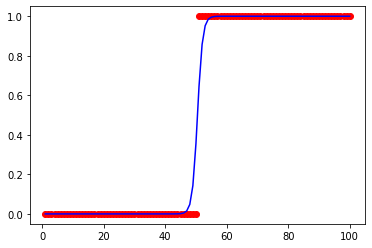

In [12]:
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['probs'],'b-')

In [13]:
model = LogisticRegression(solver='liblinear')
model.fit(df[['x']],df['y'])
m = (model.coef_)[0][0]
c = (model.intercept_)[0]

In [14]:
df["y'2"] = model.predict(df[['x']])
df['probs2'] = 1 / (1 + np.exp(-1 * (m * df['x'] + c)))
df

,x,y,y',probs,y'2,probs2
0,1,0.0,0.0,2.093955e-26,0.0,0.018581
1,2,0.0,0.0,6.914100e-26,0.0,0.020245
2,3,0.0,0.0,2.282990e-25,0.0,0.022055
3,4,0.0,0.0,7.538280e-25,0.0,0.024024
4,5,0.0,0.0,2.489090e-24,0.0,0.026163
...,...,...,...,...,...,...
95,96,1.0,1.0,1.000000e+00,1.0,0.987193
96,97,1.0,1.0,1.000000e+00,1.0,0.988253
97,98,1.0,1.0,1.000000e+00,1.0,0.989227
98,99,1.0,1.0,1.000000e+00,1.0,0.990120


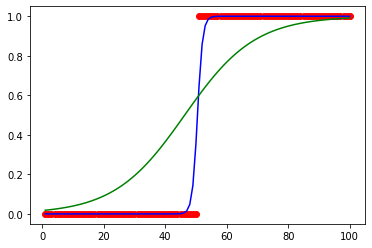

In [15]:
plt.plot(df['x'],df['y'],'ro')
plt.plot(df['x'],df['probs'],'b-')
plt.plot(df['x'],df['probs2'],'g-')